# exploration 2번째 과제</br>
## 황한용(3기/쏘카)

In [1]:
import os
from pathlib import Path
from numbers import Number
import numpy as np
import pandas as pd
from typing import Tuple, Union

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import seaborn as sns

# 과제 1 당뇨병 진단하기

## 과제 요구사항

1. 데이터 가져오기
    - sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
    - diabetes의 data를 df_X에, target을 df_y에 저장해주세요..
2. 모델에 입력할 데이터 X 준비하기
    - df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.
3. 모델에 예측할 데이터 y 준비하기
    - df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.
4. train 데이터와 test 데이터로 분리하기
    - X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.
5. 모델 준비하기
    - 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
    -  모델 함수를 구현해주세요.
6. 손실함수 loss 정의하기
    - 손실함수를 MSE 함수로 정의해주세요.
7. 기울기를 구하는 gradient 함수 구현하기
    - 기울기를 계산하는 gradient 함수를 구현해주세요.
8. 하이퍼 파라미터인 학습률 설정하기
    -  학습률, learning rate 를 설정해주세요
    -  만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.
9. 모델 학습하기
    - 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
    - loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
    - 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.
10. test 데이터에 대한 성능 확인하기
    - test 데이터에 대한 성능을 확인해주세요.
11. 정답 데이터와 예측한 데이터 시각화하기
    - x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

## 코드

### 상수값 선언

In [2]:
# train_test_split setting options
train_test_split_kwargs = {
    "test_size":0.2, "random_state":42
}
# max value of loss_old - loss_new
LOSS_STEP_DIFF_MAX = 0.000001
# loss max value
LOSS_MAX = 3000
# 8
# η
ETA = 0.1

- train_test_split_kwargs : `train_test_split`함수 세부설정
- LOSS_STEP_DIFF_MAX : 경사하강시 최소 변화량(이 이하로 정확도가 수렴할 시 학습종료)
- LOSS_MAX : 최대 loss값
- ETA : 하이퍼파라미터

### 함수부 선언

In [3]:
def model(X:np.ndarray, W:np.ndarray, b:Number) -> np.ndarray:
    """
    predict data by
    X: data(features)
    W: weight
    b: bias

    Parameters
    ----------
    X : ndarray
        data
    W : ndarray
        weight
    b : numeric
        bias

    Returns
    ----------
    ndarray
        labels data
    """
    pred_y = 0
    for i in range(X.shape[-1]):
        pred_y += X[:, i] * W[i]
    return pred_y + b

def MSE(y_pred:np.ndarray, y_test:np.ndarray) -> np.ndarray:
    """
    mse(Mean Squared Error) array by 
    y_pred: predicted data
    y_test: true data

    Parameters
    ----------
    y_pred : ndarray
        predicted data
    y_test : ndarray
        true data

    See Also
    ----------
    https://en.wikipedia.org/wiki/Mean_squared_error

    Returns
    ----------
    ndarray
        mse data
    """
    return ((y_pred - y_test)**2).mean()

def loss_by_mse(X:np.ndarray, W:np.ndarray, b:Number, y:np.ndarray, is_return_pred_y=False) -> Union[np.ndarray, Tuple[np.ndarray, Number]]:
    """
    loss array data by
    linear_model and MSE functions

    Parameters
    ----------
    X : ndarray or numberic
        data
    W : ndarray or numberic
        weight
    b : numeric
        bias
    y : ndarray
        true data
    is_return_pred_y : bool
        is return predicted value or not

    See Also
    ----------
    model function
    MSE function

    Returns
    ----------
    {numberic | (numberic,ndarray)}
        loss data by MSE function
        or
        loss data by MSE function and predicted ndarray
    """
    pred_y = model(X, W, b)
    return (MSE(pred_y, y), pred_y) if is_return_pred_y else MSE(pred_y, y)

def gradient(X:np.ndarray, W:np.ndarray, b:Number, y:np.ndarray) -> Tuple[np.ndarray,Number]:
    """
    gradient array by
    loss_by_mse function

    Parameters
    ----------
    X : ndarray or numberic
        data
    W : ndarray or numberic
        weight
    b : numeric
        bias
    y : ndarray
        true data

    See Also
    ----------
    loss_by_mse function

    Returns
    ----------
    tuple of ndarray and numberic
        dW : ndarray
            diff of weight ndarray
        db : numberic
            diff of bias
    """
    diff_y = model(X, W, b) - y
    dW = 1/len(W) * 2 * X.T.dot(diff_y)
    db = 2 * diff_y.mean()

    return dW, db

### 실행부

In [4]:
diabetes_data = load_diabetes()
# 1-2, 2, 3
df_X, df_y = diabetes_data.data, diabetes_data.target

# 4
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, **train_test_split_kwargs)

데이터 로드 및 학습, 예측값을 분리</br>
학습과 예측에 사용되는 각각 8:2비율로 분리

In [5]:
W = np.random.rand(df_X.shape[-1])
b = np.random.rand()

임의의 가중치 `W`와 편향치`b`를 임의로 선정

In [6]:
loss_step_diff = 1

이전 loss - 현재 loss(차분)

In [7]:
while True:
    dW, db = gradient(X_train, W, b, y_train)
    W -= ETA * dW
    b -= ETA * db
    L = loss_by_mse(X_train, W, b, y_train)

    # check cond
    if not(LOSS_STEP_DIFF_MAX > loss_step_diff) and not(LOSS_MAX < L):
        print(f"diabetes train loss = {L:.5f}")
        break

diabetes train loss = 2997.46599



loss가 3000미만, 이전 loss - 현재 loss 차분이 0.000001 미만이 될때까지 학습

In [8]:
pred_L, pred_y = loss_by_mse(X_test,W,b,y_test,True)
print(f"diabetes test loss = {pred_L:.4f}")

diabetes test loss = 2877.5829


예측시행</br>
예측시의 loss값, 예측된 값을 리턴

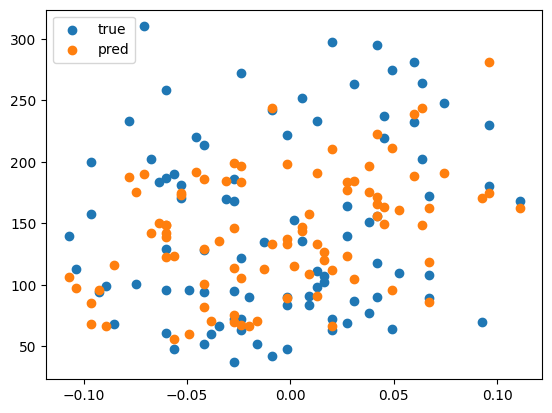

In [9]:

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], pred_y, label="pred")
plt.legend()

plt.show()

정답 데이터와 예측한 데이터 시각화

# 과제 2 자전거 타는 인원 예측
## 과제 요구사항
1. 데이터 가져오기
    - bike.csv 데이터를 train 변수로 가져 옵니다.
2. to_datetime를 활용하여 datetime 컬럼을 datetime 자료형으로 변환 후
    - 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
3. year, month, day, hour, minute, second 데이터 개수 시각화하기
    - sns.countplot 활용해서 시각화하기
    - subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
4. X, y 컬럼 선택 및 train/test 데이터 분리
5. LinearRegression 모델 학습
6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
    - x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
    - x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

## 코드

### 상수값 선언

In [10]:
useless_cols = ["datetime", "casual", "registered"]
y_col = "count"

BASE_DIR = Path("./").parent.resolve()
tarins_kwargs = {"random_state":17,"test_size":0.2}

- useless_cols : 필요없는 컬럼
- y_col : 예측컬럼
- BASE_DIR : 기본 경로
- train_test_split_kwargs : `train_test_split`함수 세부설정

In [11]:

df = pd.read_csv(os.path.join(BASE_DIR,"bike.csv"))

df["datetime"] = pd.to_datetime(df["datetime"])
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["minute"] = df["datetime"].dt.minute
df["second"] = df["datetime"].dt.second

데이터 로드 및 `datetime`이라는 시간에 관련된 칼럼을
- year : 년
- month : 월
- day : 일
- hour : 시
- minute : 분
- second : 초
</br>로 분리

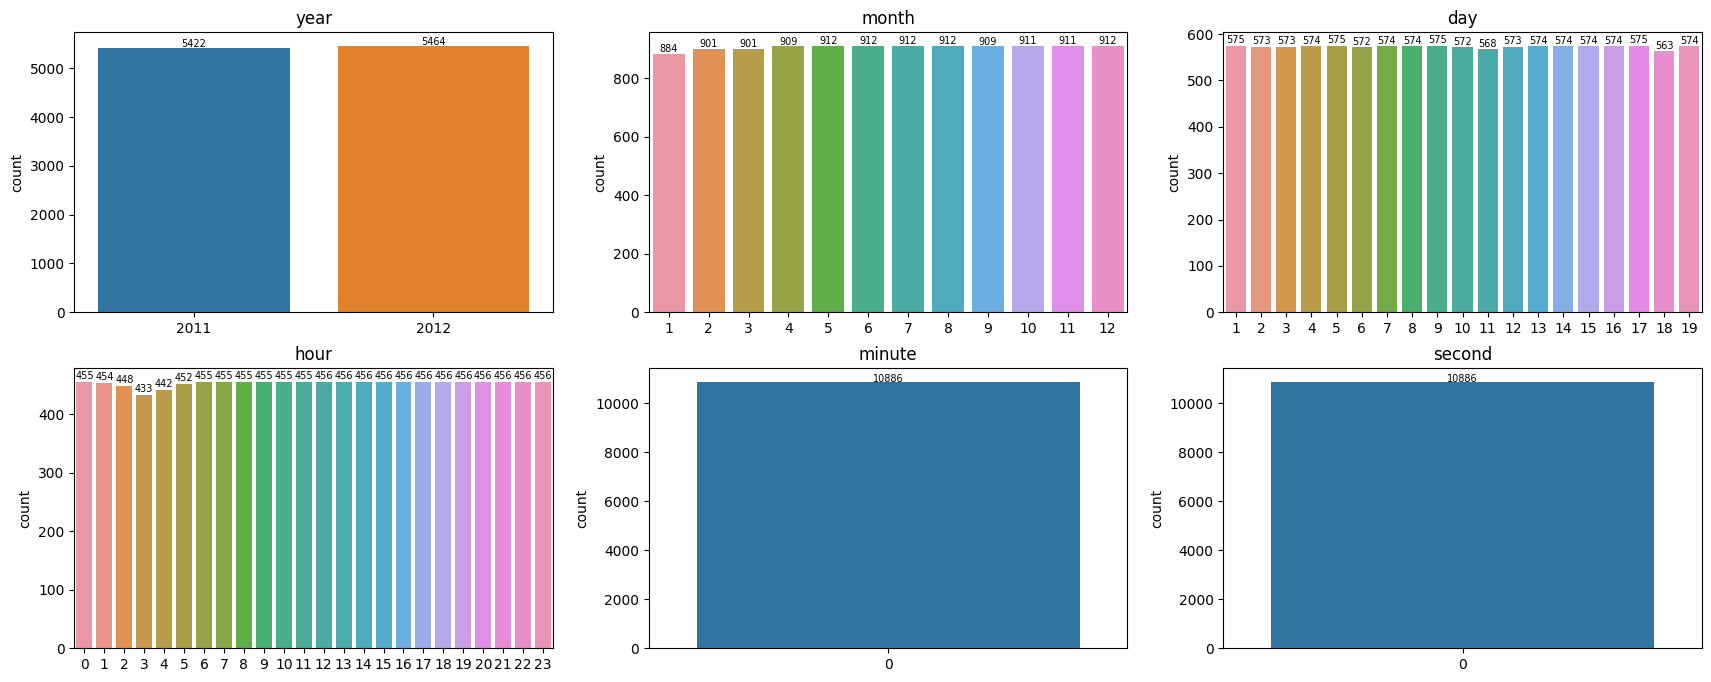

In [12]:
figure, axs = plt.subplots(nrows=2, ncols=3)
axs = axs.reshape(1,-1)[0]
figure.set_size_inches(21, 8)
for ax, col_name in zip(axs, ["year", "month", "day", "hour", "minute", "second"]):
    gh = sns.countplot(data=df, x=col_name, order=list(set(df[f"{col_name}"])), ax=ax)
    gh.set_xlabel("")
    gh.set_title(col_name)
    for p in ax.patches:
        height = int(p.get_height())
        ax.text(p.get_x() + p.get_width() / 2., height + 5, height, ha = "center", size = 7)

plt.show()

`year`, `month`, `day`, `hour`, `minute`, `second`의 결측치 확인
</br>결측치는 없는 것으로 확인 

In [13]:
df.drop(columns=useless_cols, inplace=True)
X_cols = list(df.columns)
X_cols.remove(y_col)
y = df[y_col]
X = df.loc[:,X_cols]

쓸모없는 칼럼을 제거 후, 예측과 타겟값 분리

In [14]:
# 4-2.
X_train, X_test, y_train, y_test = train_test_split(X, y, **tarins_kwargs)

model = LinearRegression()
model.fit(X_train.to_numpy(), y_train.to_numpy())
pred_y = model.predict(X_test.to_numpy())

학습 및 예측

In [15]:

mse = ((pred_y - y_test)**2).mean()
rmse = mse**0.5
print(f"diabetes mse: {mse}\ndiabetes rmse: {rmse}")

diabetes mse: 20401.793737812015
diabetes rmse: 142.83484777116547


mse, rmse값 확인

In [16]:
pred_y =  pred_y.astype(np.int64)
pred_y[pred_y < 0] = 0


후처리
- 0.5명은 사람이 아니므로 0으로 판단(소수점 자리 버림)
- 같은 맥락으로 인원의 수가 음수일 경우도 없으므로 음수의 값음 0으로 처리
</br>※ MSE, RMSE값은 모델의 성능을 평가하는 것이므로 예측된 값 자체를 평가지표로 해야한다고 판단

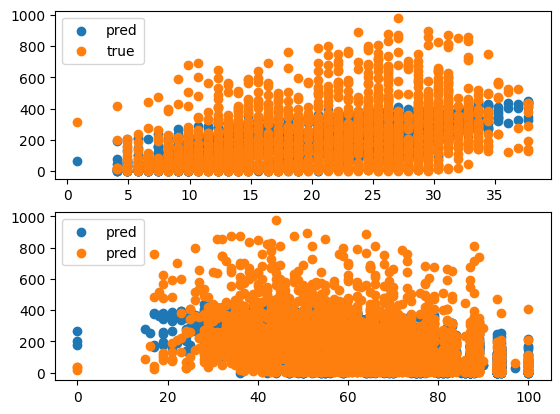

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(X_test["temp"], pred_y, label="pred")
ax1.scatter(X_test["temp"], y_test, label="true")
ax1.legend()
ax2.scatter(X_test["humidity"], pred_y, label="pred")
ax2.scatter(X_test["humidity"], y_test, label="pred")
ax2.legend()

plt.show()

x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기